In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-22 03:55:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-22 03:55:32 (112 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(.2))
model.add(LSTM(64))
model.add(Dense(32, activation = "relu", kernel_regularizer = regularizers.l2(.01)))
model.add(Dense(total_words, activation = "softmax"))
optimizer = Adam(lr = .01)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 256)           197632    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                82176     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 3211)              105963    
Total params: 593,355
Trainable params: 593,355
Non-trainable params: 0
________________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=500, verbose=1)

Epoch 1/500
484/484 [==============================] - 5s 10ms/step - loss: 6.8990 - accuracy: 0.0216
Epoch 2/500
484/484 [==============================] - 5s 10ms/step - loss: 6.5457 - accuracy: 0.0209
Epoch 3/500
484/484 [==============================] - 4s 9ms/step - loss: 6.4620 - accuracy: 0.0252
Epoch 4/500
484/484 [==============================] - 5s 10ms/step - loss: 6.4207 - accuracy: 0.0276
Epoch 5/500
484/484 [==============================] - 5s 9ms/step - loss: 6.3758 - accuracy: 0.0282
Epoch 6/500
484/484 [==============================] - 5s 10ms/step - loss: 6.3510 - accuracy: 0.0295
Epoch 7/500
484/484 [==============================] - 5s 10ms/step - loss: 6.3285 - accuracy: 0.0294
Epoch 8/500
484/484 [==============================] - 5s 10ms/step - loss: 6.3057 - accuracy: 0.0310
Epoch 9/500
484/484 [==============================] - 5s 10ms/step - loss: 6.2866 - accuracy: 0.0333
Epoch 10/500
484/484 [==============================] - 5s 10ms/step - loss: 6.2628 

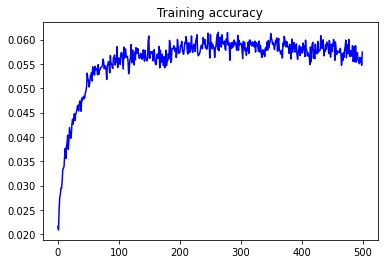

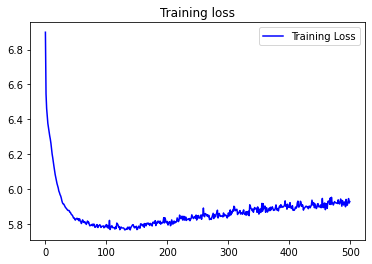

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the love of the
